In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load the dataset
file_path = 'Life Expectancy Data.csv'
data = pd.read_csv(file_path)

# Impute missing values for numerical columns with their median values
for column in data.columns:
    if data[column].dtype == 'float64' or data[column].dtype == 'int64':
        data[column].fillna(data[column].median(), inplace=True)

# Encode the 'Status' column into numeric format
data = pd.get_dummies(data, columns=['Status'], drop_first=True)
data.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,True
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,True
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,True
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,True
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,True


In [14]:
# Selecting variables
X = data.drop(['Country', 'Year', 'Life expectancy '], axis=1)
y = data['Life expectancy ']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Linear regression model creation and fitting
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predictions on test set
y_pred = model.predict(X_test)

In [17]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
# Performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 15.292605865415135
R-squared (R²): 0.8235482778136448


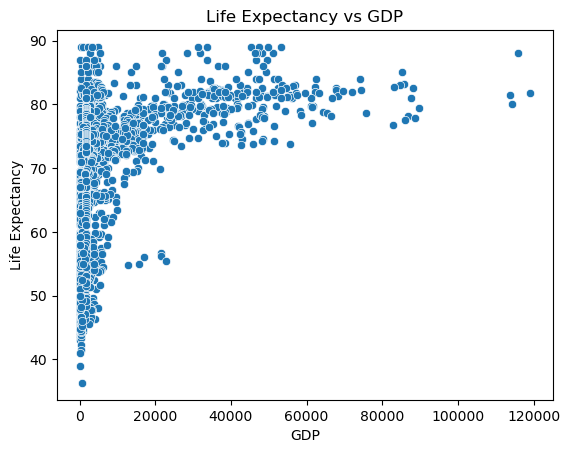

In [23]:
# Scatter plot for Life expectancy vs GDP
sns.scatterplot(data=data, x='GDP', y='Life expectancy ')
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

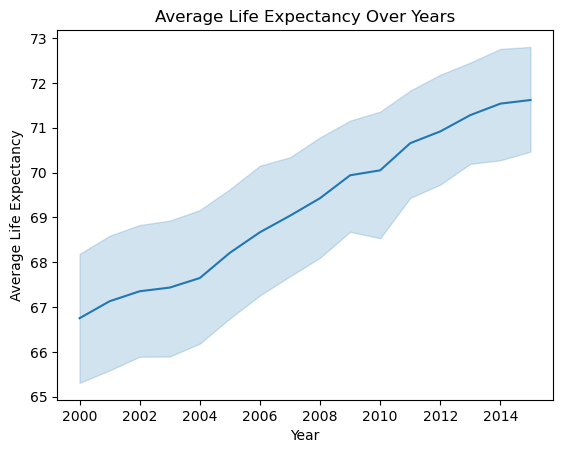

In [36]:
# Plot of Life expectancy trends over time
sns.lineplot(data=data, x='Year', y='Life expectancy ', estimator='mean')
plt.title('Average Life Expectancy Over Years')
plt.ylabel('Average Life Expectancy')
plt.xlabel('Year')
plt.show()

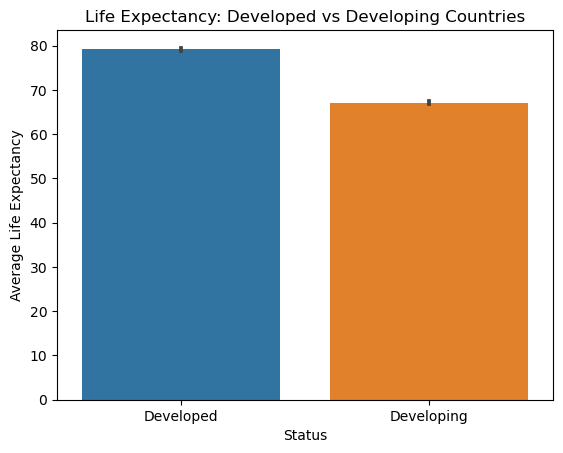

In [37]:
# Comparison of Developed vs Developing Countries
sns.barplot(data=data, x='Status_Developing', y='Life expectancy ')
plt.title('Life Expectancy: Developed vs Developing Countries')
plt.xticks([0, 1], ['Developed', 'Developing'])
plt.ylabel('Average Life Expectancy')
plt.xlabel('Status')
plt.show()

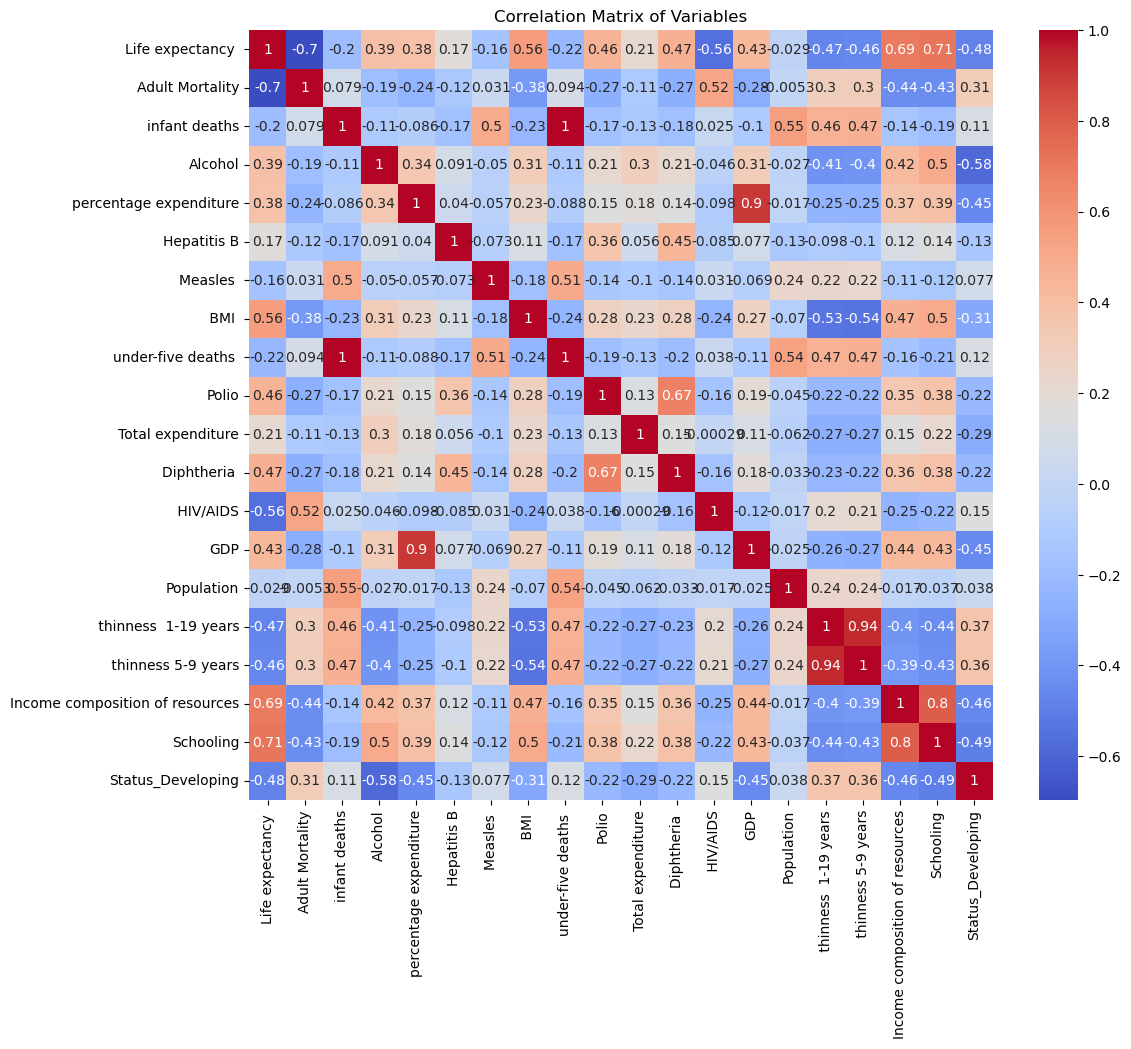

In [38]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.drop(['Country', 'Year'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

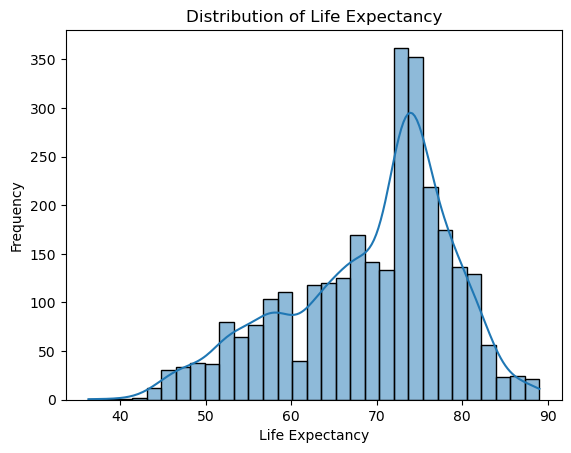

In [39]:
# Life expectancy distribution
sns.histplot(data=data, x='Life expectancy ', kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()